In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization


In [2]:
model = load_model('G_final.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [3]:
for i in range(3):
    model.pop()
for layer in model.layers:
    layer.trainable = False

In [4]:
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(32,32,3,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4, name='dropout_3'))

#2nd Fully Connected Layer
model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4, name='dropout_4'))

#3rd Fully Connected Layer
model.add(Dense(1000))
model.add(BatchNormalization())
model.add(Activation('relu'))
#Add Dropout
model.add(Dropout(0.4, name='dropout_5'))

#Output Layer
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image

In [6]:
train_data_dir = "D:/Projects/Datasets/Reduced_Sign_Dataset/Train"
test_data_dir = "D:/Projects/Datasets/Reduced_Sign_Dataset/Test"
categories = os.listdir(train_data_dir)
print(len(categories))

10


In [7]:
X_train = []
y_train = []
train_data = []
# for loop to save all images data and labels after resize it 
for category in categories:
    label = categories.index(category)
    path = os.path.join(train_data_dir,category)
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            train_data.append([image, label])
        except Exception as e:
            print(e)

In [8]:
import random
random.shuffle(train_data)
for image,label in train_data:
    X_train.append(image)
    y_train.append(label)

In [9]:
X_train =  np.array(X_train)
y_train = np.array(y_train)

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split=0.3)

Epoch 1/20
48/48 [==============================] - 6s 112ms/step - loss: 1.0652 - accuracy: 0.8254 - val_loss: 0.4886 - val_accuracy: 0.9223
Epoch 2/20
48/48 [==============================] - 5s 107ms/step - loss: 0.7832 - accuracy: 0.9333 - val_loss: 0.3327 - val_accuracy: 0.9802
Epoch 3/20
48/48 [==============================] - 5s 107ms/step - loss: 0.6990 - accuracy: 0.9424 - val_loss: 0.3633 - val_accuracy: 0.9832
Epoch 4/20
48/48 [==============================] - 5s 107ms/step - loss: 0.6349 - accuracy: 0.9451 - val_loss: 0.3498 - val_accuracy: 0.9832
Epoch 5/20
48/48 [==============================] - 5s 108ms/step - loss: 0.5871 - accuracy: 0.9529 - val_loss: 0.3593 - val_accuracy: 0.9832
Epoch 6/20
48/48 [==============================] - 5s 107ms/step - loss: 0.5402 - accuracy: 0.9503 - val_loss: 0.3221 - val_accuracy: 0.9848
Epoch 7/20
48/48 [==============================] - 5s 107ms/step - loss: 0.5024 - accuracy: 0.9555 - val_loss: 0.3299 - val_accuracy: 0.9817
Epoch 

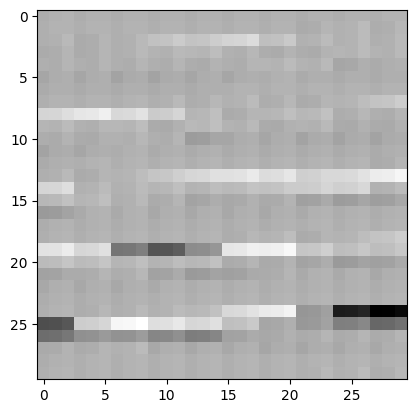